# Non-Linear Regression

Predict the GDP of china which is non linear

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(r'C:\Users\prajw\Downloads\china_gdp.csv')
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


plot the dataset

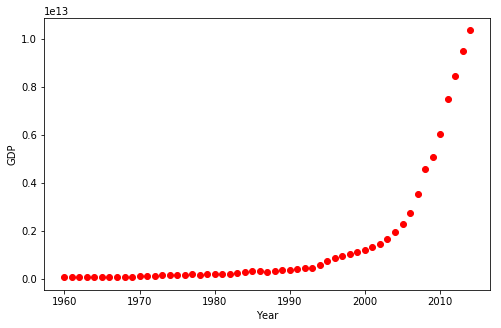

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(df.Year,df.Value,color='red')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Choosing a model

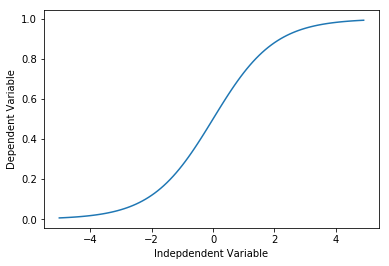

In [18]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## Building The Model

In [19]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

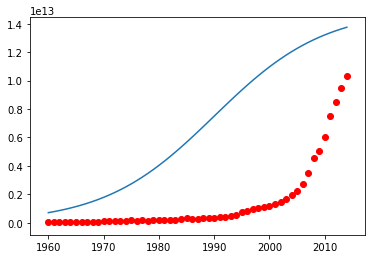

In [25]:
beta_1 = 0.10
beta_2 = 1990.0

y_pred=sigmoid(df.Year,beta_1,beta_2)

plt.plot(df.Year,y_pred*15000000000000)
plt.scatter(df.Year,df.Value,color='red')


In [26]:
#Normalize
xdata=df.Year/max(df.Year)
ydata=df.Value/max(df.Value)

In [28]:
#use curve fit to get the best parameters
from scipy.optimize import curve_fit
popt,pcov=curve_fit(sigmoid,xdata,ydata)

print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


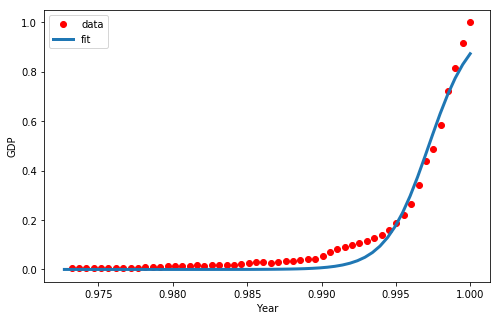

In [38]:
x=np.linspace(1960,2015,55)
x=x/max(x)
plt.figure(figsize=(8,5))
y=sigmoid(x,*popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Accurracy

In [39]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

popt, pcov = curve_fit(sigmoid, train_x, train_y)

y_hat = sigmoid(test_x, *popt)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )


Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.94
